In [1]:
import pandas as pd
import numpy as np
cabi_hr = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/bike+sharing+dataset/hour.csv')
cabi_hr_copy = cabi_hr.copy() 

In [2]:
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#hunting nans
nan_indices = cabi_hr.isna()
print(nan_indices.any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [4]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=cabi_hr.isna().sum().sum()
print(nan_count)

0


In [5]:
#hunting duplicates, none found
duplicateRows = cabi_hr[cabi_hr.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [6]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
cabi_hr['dteday'] = pd.to_datetime(cabi_hr['dteday'])
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [7]:
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [15]:
# we are creating a new column called "season_name", based on months, because the dataset
#season calculator is way way off
def sname_maker(month):
    if month == 12:
        return 'winter'
    elif month <= 2:
        return 'winter'
    elif month <= 5:
        return 'spring'
    elif month <= 8:
        return 'summer'
    elif month <= 11:
        return 'fall'

cabi_hr['season_name'] = cabi_hr['mnth'].apply(sname_maker)



In [34]:
# we are creating a new column called "dayname", based on days of week, because the dataset
#days are 0-6, 0 is sunday, 6 is saturday
def dname_maker(day):
    if day == 0:
        return 'sunday'
    elif day == 1:
        return 'monday'
    elif day == 2:
        return 'tuesday'
    elif day == 3:
        return 'wednesday'
    elif day == 4:
        return 'thursday'
    elif day == 5:
        return 'friday'
    elif day == 6:
        return 'saturday'

cabi_hr['dayname'] = cabi_hr['weekday'].apply(dname_maker)

In [35]:
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,winter,saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,winter,saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,winter,saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,winter,saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,winter,saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,monday
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,monday
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,monday
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,monday


In [33]:
cabi_hr.loc[17350:]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name
17350,17351,2012-12-30,1,1,12,19,0,0,0,1,0.34,0.3636,0.61,0.0000,16,86,102,winter
17351,17352,2012-12-30,1,1,12,20,0,0,0,1,0.22,0.1970,0.47,0.3284,9,63,72,winter
17352,17353,2012-12-30,1,1,12,21,0,0,0,1,0.20,0.2121,0.51,0.1642,5,42,47,winter
17353,17354,2012-12-30,1,1,12,22,0,0,0,1,0.20,0.1970,0.55,0.1940,6,30,36,winter
17354,17355,2012-12-30,1,1,12,23,0,0,0,1,0.20,0.1970,0.51,0.2239,10,39,49,winter
17355,17356,2012-12-31,1,1,12,0,0,1,1,1,0.18,0.1818,0.55,0.1940,4,30,34,winter
17356,17357,2012-12-31,1,1,12,1,0,1,1,1,0.18,0.1818,0.55,0.1940,6,13,19,winter
17357,17358,2012-12-31,1,1,12,2,0,1,1,1,0.16,0.1667,0.59,0.1642,3,8,11,winter
17358,17359,2012-12-31,1,1,12,3,0,1,1,1,0.16,0.1818,0.59,0.1045,0,1,1,winter
17359,17360,2012-12-31,1,1,12,4,0,1,1,1,0.14,0.1667,0.69,0.1045,0,3,3,winter


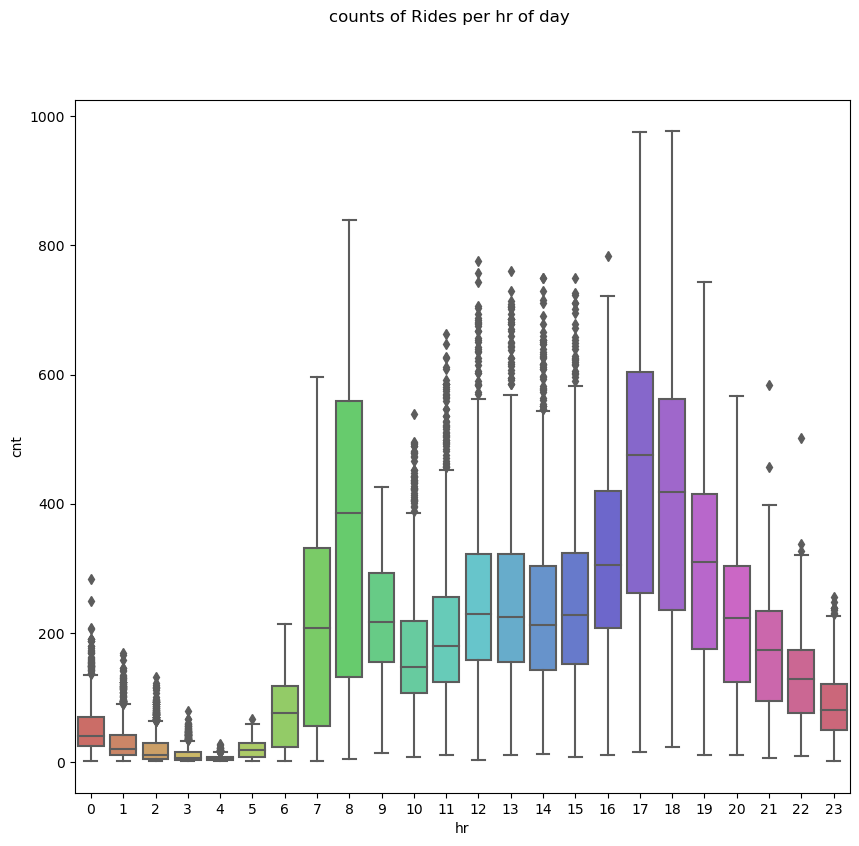

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,9))

sns.boxplot(data=cabi_hr, x='hr', y='cnt', palette='hls')
plt.suptitle('counts of Rides per hr of day')
plt.show()

In [37]:
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [38]:
#converting multiple columns to categorical
cabi_hr = cabi_hr.astype({'season': 'category', 'yr': 'category', 'mnth': 'category', 
                          'hr': 'category', 'holiday': 'category', 'weekday': 'category',
                           'workingday': 'category', 'weathersit': 'category', 
                           'season_name': 'category', 'dayname': 'category'})
cabi_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [40]:
cabi_hr.loc[cabi_hr['holiday'] == 0, 'is_holiday'] = 'No'
cabi_hr.loc[cabi_hr['holiday'] == 1, 'is_holiday'] = 'Yes'
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,winter,saturday,No
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,winter,saturday,No
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,winter,saturday,No
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,winter,saturday,No
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,winter,saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,monday,No
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,monday,No
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,monday,No
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,monday,No


In [50]:
cabi_hr.loc[cabi_hr['season_name'] == 'winter', 'season'] = 4
cabi_hr.loc[cabi_hr['season_name'] == 'spring', 'season'] = 1
cabi_hr.loc[cabi_hr['season_name'] == 'summer', 'season'] = 2
cabi_hr.loc[cabi_hr['season_name'] == 'fall', 'season'] = 3
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday
0,1,2011-01-01,4,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,winter,saturday,No
1,2,2011-01-01,4,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,winter,saturday,No
2,3,2011-01-01,4,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,winter,saturday,No
3,4,2011-01-01,4,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,winter,saturday,No
4,5,2011-01-01,4,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,winter,saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,4,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,monday,No
17375,17376,2012-12-31,4,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,monday,No
17376,17377,2012-12-31,4,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,monday,No
17377,17378,2012-12-31,4,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,monday,No


In [51]:
cabi_hr = cabi_hr.astype({'is_holiday': 'category'})
cabi_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

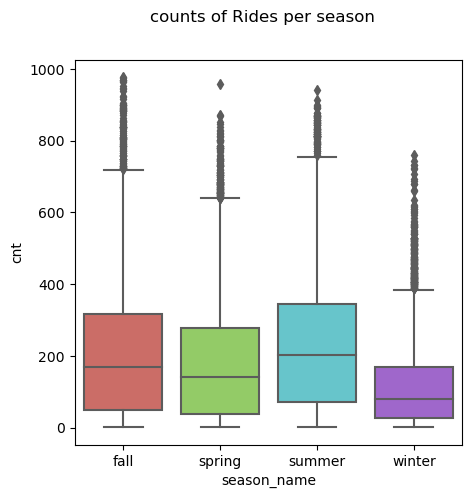

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))

sns.boxplot(data=cabi_hr, x='season_name', y='cnt', palette='hls')
plt.suptitle('counts of Rides per season')
plt.show()

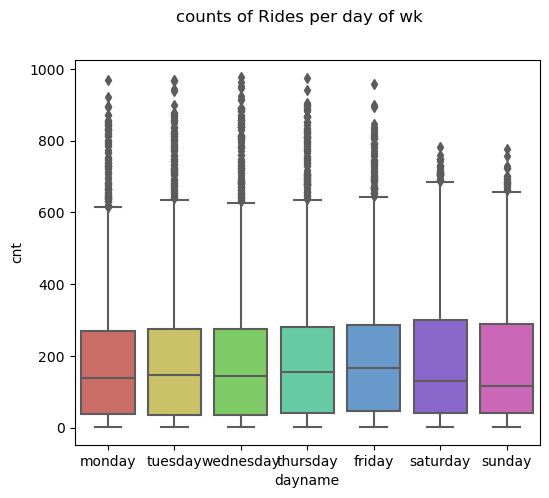

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,5))

sns.boxplot(data=cabi_hr, x='dayname', y='cnt', palette='hls', order=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.suptitle('counts of Rides per day of wk')
plt.show()

In [69]:
corr_cabi_hr = cabi_hr.corr()
corr_cabi_hr

/var/folders/dt/36zskqd97kv75gn6l517twyh0000gn/T/ipykernel_58451/4244322749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cabi_hr = cabi_hr.corr()


,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


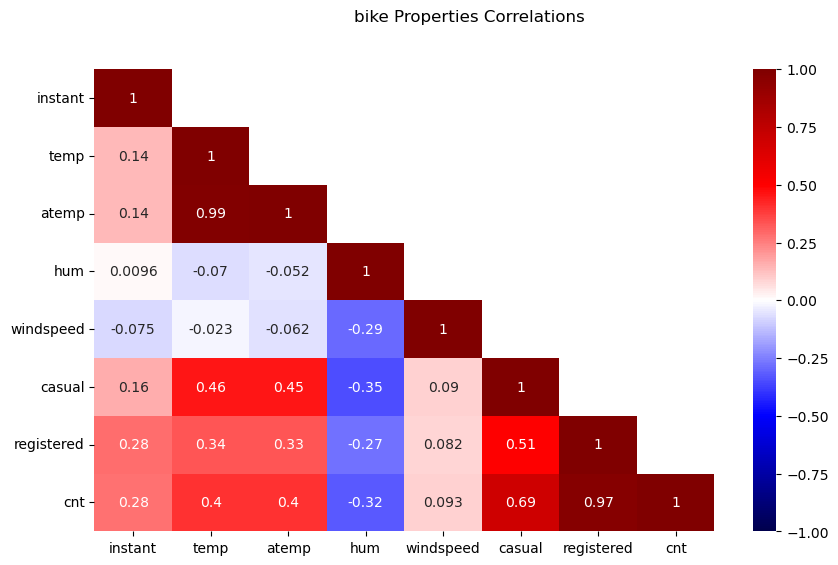

In [70]:
#seaborn heatmap using .corr
fig, ax = plt.subplots(figsize=(10,6))

# Create a mask
mask = np.triu(np.ones_like(corr_cabi_hr, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(corr_cabi_hr, annot=True, cmap="seismic", mask=mask, vmin=-1.0, vmax=1.0)
fig.suptitle('bike Properties Correlations')
plt.show()

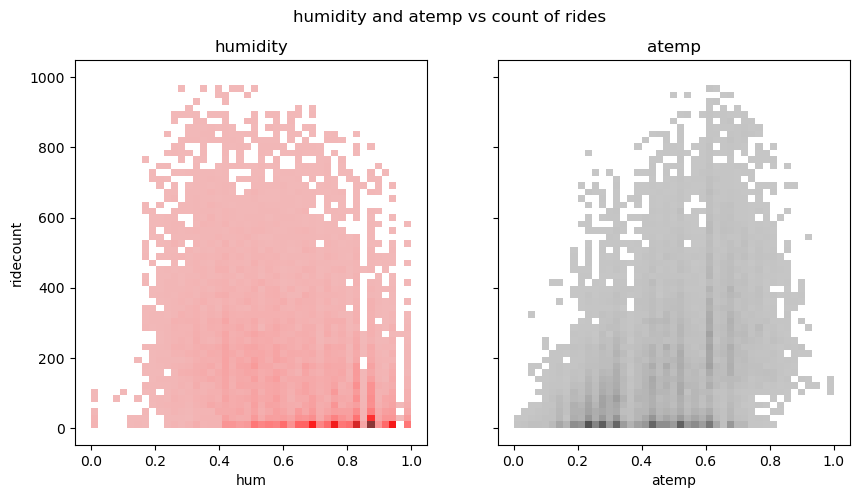

In [75]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))


sns.histplot(data=cabi_hr, x = 'hum', y='cnt', ax=ax[0], color='red',).set(title='humidity', ylabel = 'ridecount')
sns.histplot(data=cabi_hr, x = 'atemp',y='cnt', ax=ax[1], color='white', ).set(title='atemp', ylabel = 'ridecount')
fig.suptitle('humidity and atemp vs count of rides')

ax[0].set_ylim(top=1050)
ax[1].set_ylim(top=1050)
plt.show()

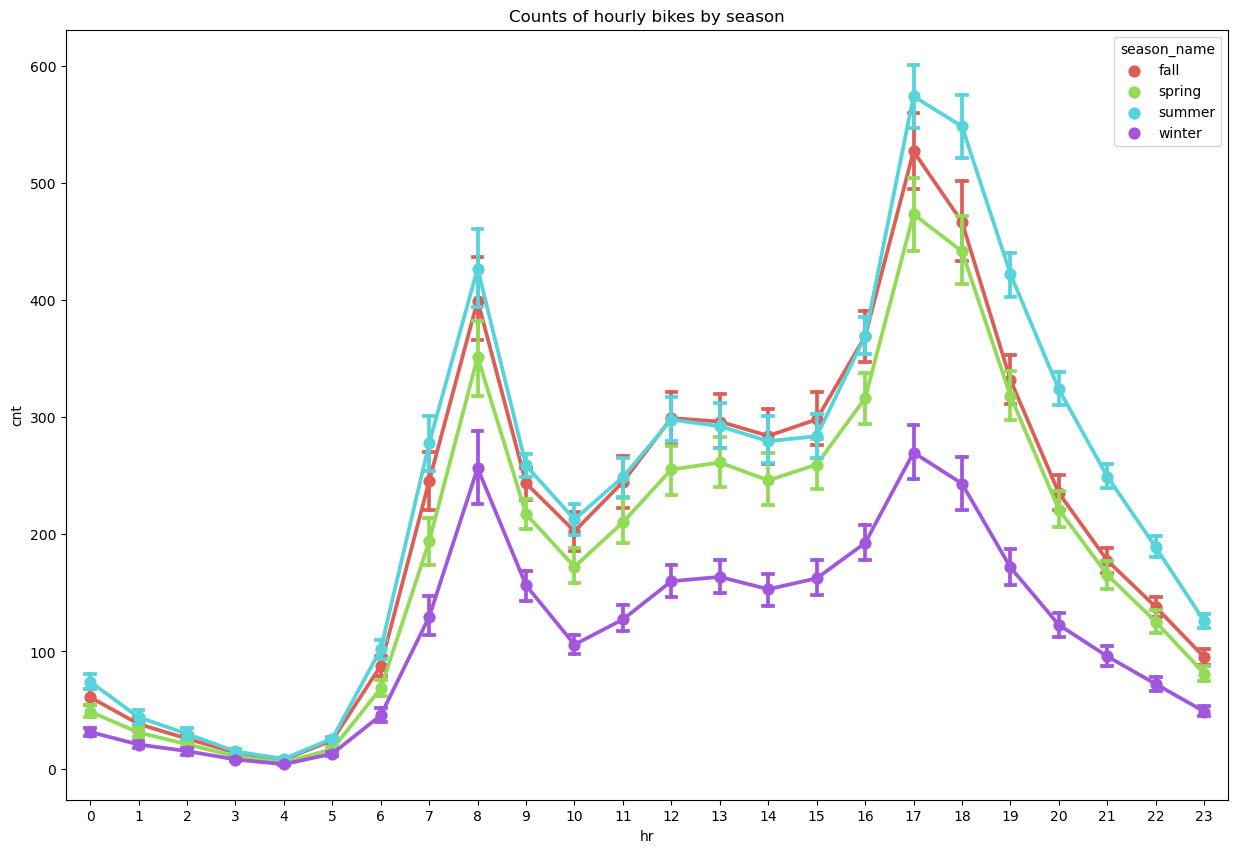

In [104]:
#counts by season graph
fig,ax = plt.subplots(figsize=(15,10))

sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="season_name", 
    capsize=.2, palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes by season")
plt.show()

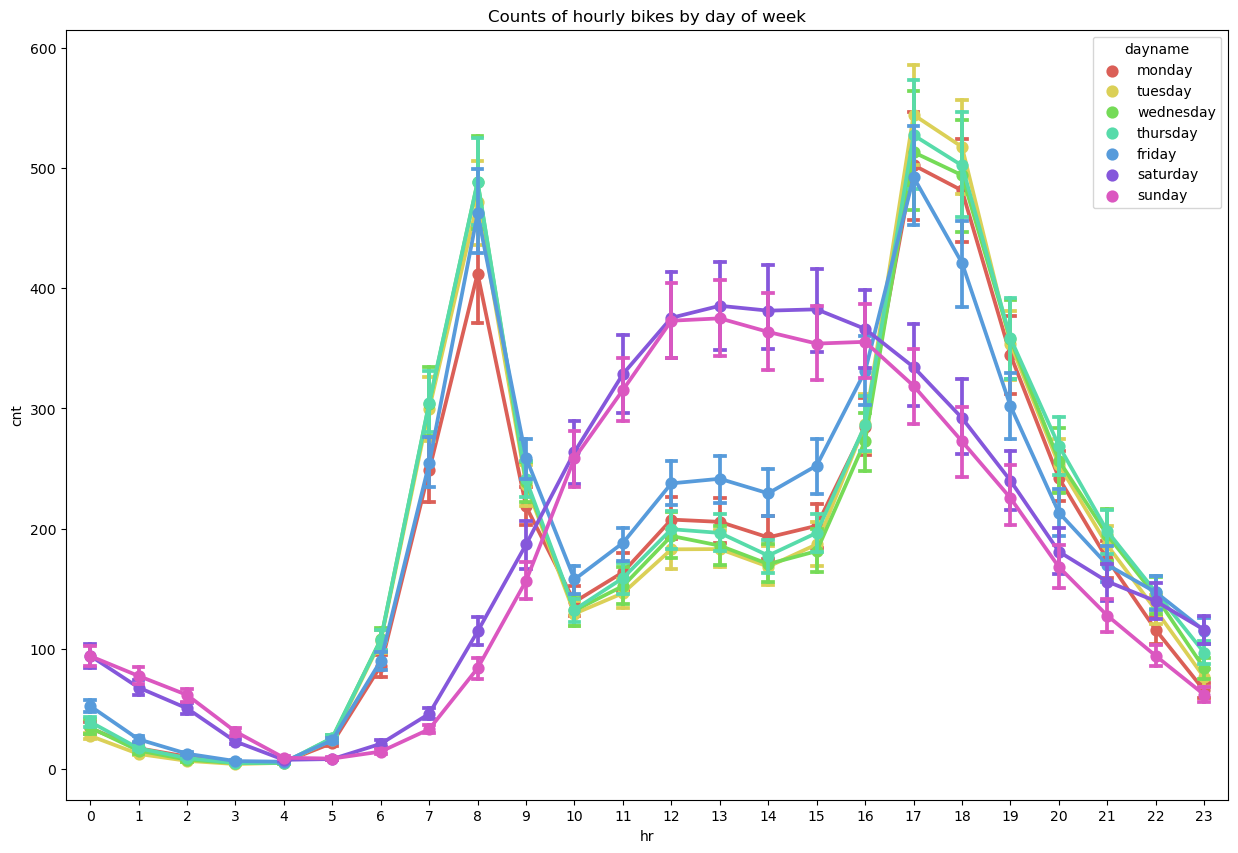

In [111]:

fig,ax = plt.subplots(figsize=(15,10))
hue_order=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="dayname", hue_order=hue_order, capsize=.2,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes by day of week")
plt.show()

Ideas: Could use ML to predict how many bikes are going to be in use during certain hour periods

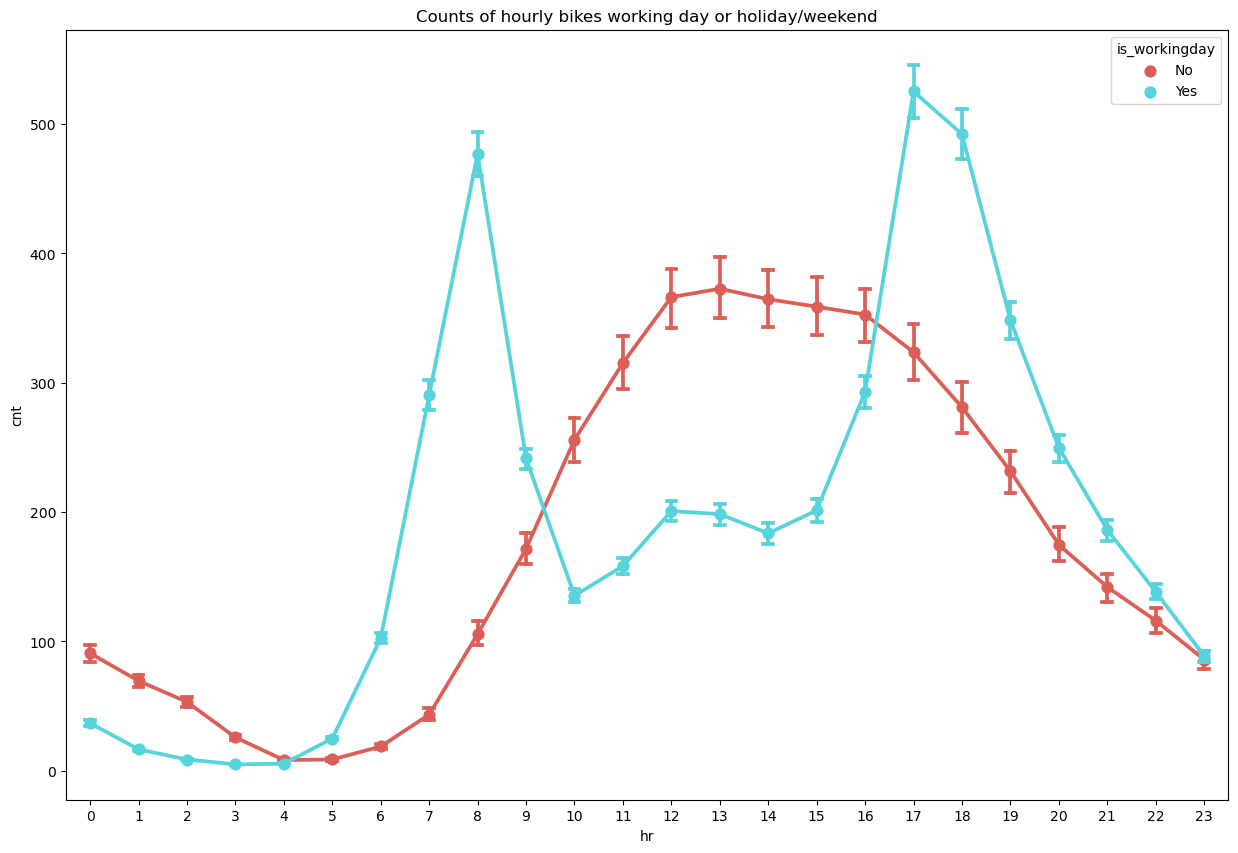

In [116]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="is_workingday", capsize=.2,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes working day or holiday/weekend")
plt.show()

In [117]:
cabi_hr.loc[cabi_hr['workingday'] == 0, 'is_workingday'] = 'No'
cabi_hr.loc[cabi_hr['workingday'] == 1, 'is_workingday'] = 'Yes'
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,winter,saturday,No,No
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,winter,saturday,No,No
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,winter,saturday,No,No
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,winter,saturday,No,No
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,winter,saturday,No,No


In [118]:
cabi_hr.loc[cabi_hr['weathersit'] == 1, 'weathersit_desc'] = 'good'
cabi_hr.loc[cabi_hr['weathersit'] == 2, 'weathersit_desc'] = 'less_good_mist'
cabi_hr.loc[cabi_hr['weathersit'] == 3, 'weathersit_desc'] = 'worse_light_precip'
cabi_hr.loc[cabi_hr['weathersit'] == 4, 'weathersit_desc'] = 'bad_heavy_precip'
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,winter,saturday,No,No,good
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,winter,saturday,No,No,good
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,winter,saturday,No,No,good
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,winter,saturday,No,No,good
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,winter,saturday,No,No,good


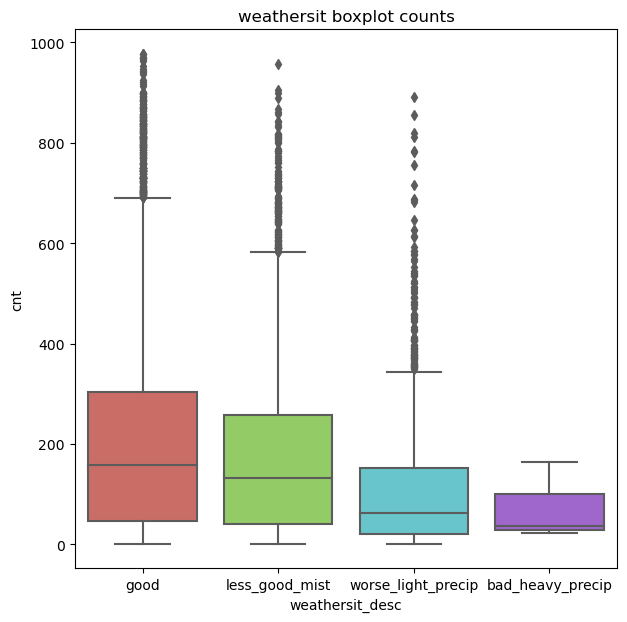

In [122]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=cabi_hr, x="weathersit_desc", y="cnt",
     palette="hls", ax=ax)
ax.set(title="weathersit boxplot counts")
plt.show()

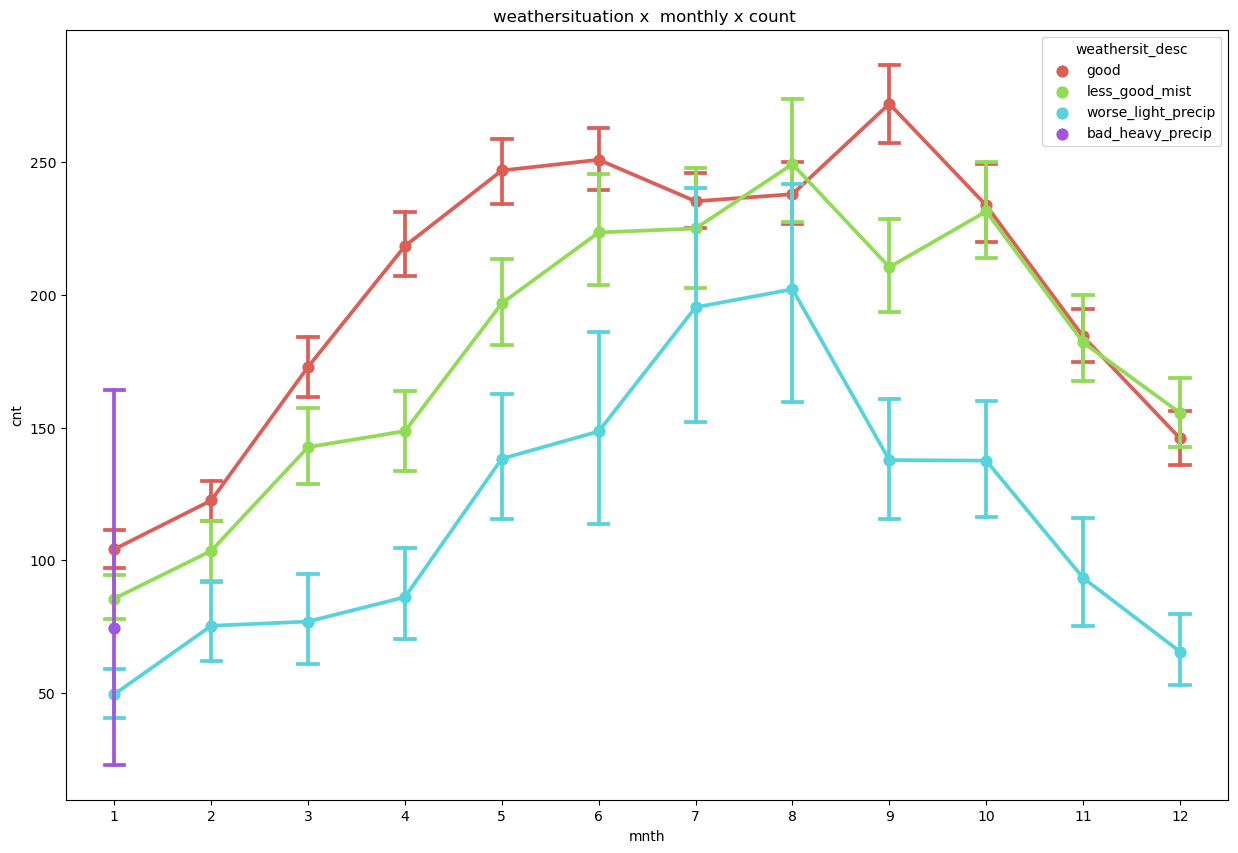

In [125]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=cabi_hr, x="mnth", y="cnt", hue="weathersit_desc", capsize=.2,
     palette="hls", ax=ax)
ax.set(title="weathersituation x  monthly x count ")
plt.show()

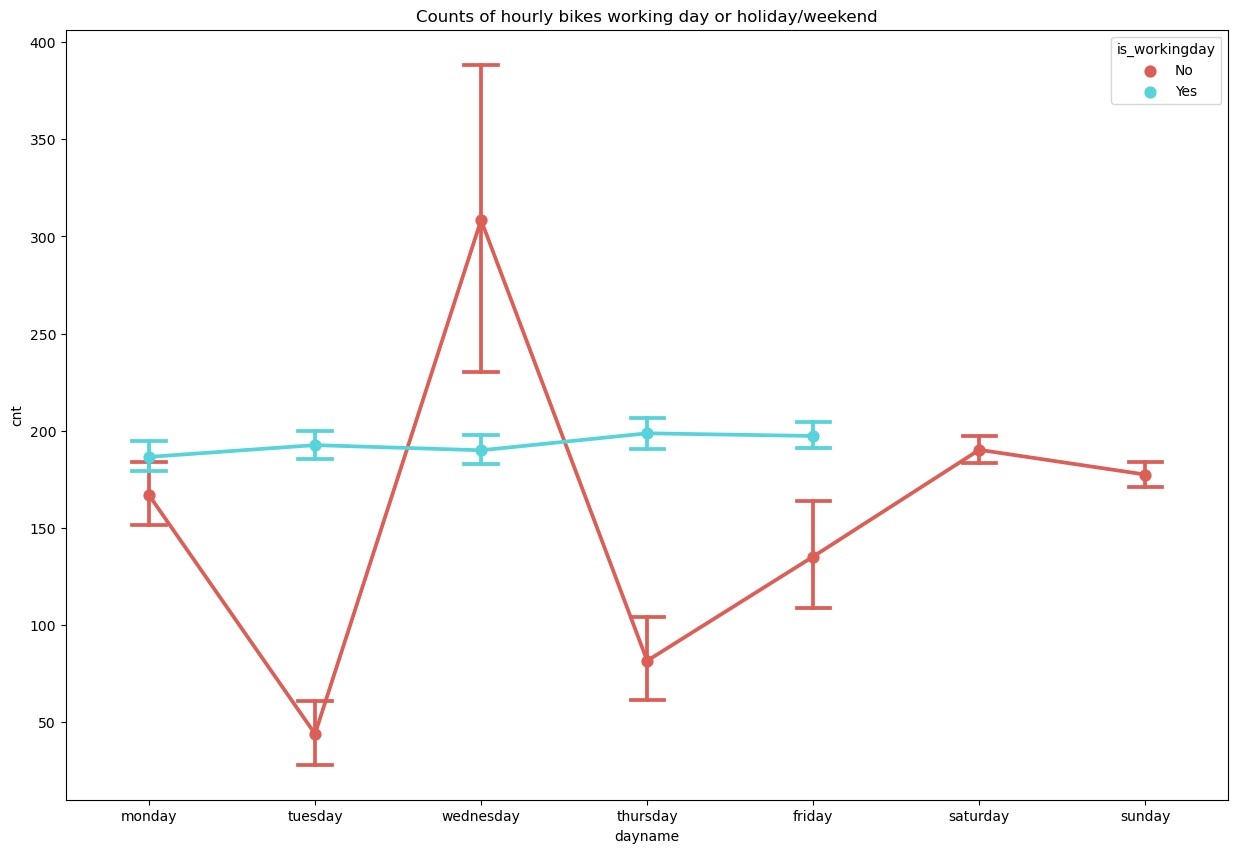

In [129]:
fig,ax = plt.subplots(figsize=(15,10))
xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
sns.pointplot(data=cabi_hr, x="dayname", y="cnt", hue="is_workingday", capsize=.2, order=xorder,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes working day or holiday/weekend")
plt.show()

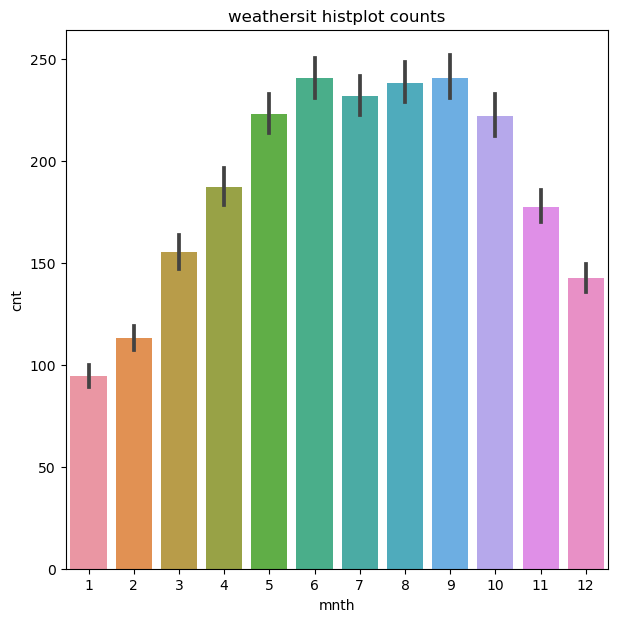

In [133]:
fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(data=cabi_hr, x="mnth", y="cnt",)
ax.set(title="weathersit histplot counts")
plt.show()